In [18]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [19]:
def load_df(path1, path2):
    X_train = pd.read_csv(path1)
    y_train = pd.read_csv(path2)
    return (X_train, y_train)

In [20]:
# Prendo i set dalla cartella Train_Test

(X_train, y_train) = load_df("./Datasets/Train_Test/X_train.csv", "./Datasets/Train_Test/y_train.csv")
(X_test, y_test) = load_df("./Datasets/Train_Test/X_test.csv", "./Datasets/Train_Test/y_test.csv")

In [21]:
# Prendo i set dalla cartella Train_Val_Test

(X_train2, y_train2) = load_df("./Datasets/Train_Val_Test/X_train.csv", "./Datasets/Train_Val_Test/y_train.csv")
(X_test2, y_test2) = load_df("./Datasets/Train_Val_Test/X_test.csv", "./Datasets/Train_Val_Test/y_test.csv")
(X_val2, y_val2) = load_df("./Datasets/Train_Val_Test/X_val.csv", "./Datasets/Train_Val_Test/y_val.csv")

# Gestione Outliers

In [22]:
def handling_outliers_train(df):
    medians = df.median()

    iqr_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_dict[column] = (Q1, Q3, IQR)
        outlier_mask = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df.loc[outlier_mask, column] = medians[column]
    
    return df, medians, iqr_dict

def handling_outliers_test(df, medians, iqr_dict):
    for column in df.columns:
        if column in iqr_dict:
            Q1, Q3, IQR = iqr_dict[column]
            outlier_mask = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
            df.loc[outlier_mask, column] = medians[column]
    
    return df

In [23]:
# Gestisco gli outliers sulla split Test-Train

X_train, medians, iqr_dict = handling_outliers_train(X_train)
X_test = handling_outliers_test(X_test, medians, iqr_dict)

In [24]:
# Gestisco gli outliers sulla split Test-Val-Train

X_train2, medians2, iqr_dict2 = handling_outliers_train(X_train2)
X_val2 = handling_outliers_test(X_val2, medians2, iqr_dict2)
X_test2 = handling_outliers_test(X_test2, medians2, iqr_dict2)

# Standardizzazione

In [25]:
# Prendo i set dalla cartella Train_Val_Test

(X_train_no_outliers, y_train_no_outliers) = load_df("./Datasets/Train_Val_Test/X_train.csv", "./Datasets/Train_Val_Test/y_train.csv")
(X_test_no_outliers, y_test_no_outliers) = load_df("./Datasets/Train_Val_Test/X_test.csv", "./Datasets/Train_Val_Test/y_test.csv")
(X_val_no_outliers, y_val_no_outliers) = load_df("./Datasets/Train_Val_Test/X_val.csv", "./Datasets/Train_Val_Test/y_val.csv")

In [26]:
# Prendo i set dalla cartella Train_Test

(X_train_no_outliers2, y_train_no_outliers2) = load_df("./Datasets/Train_Test/X_train.csv", "./Datasets/Train_Test/y_train.csv")
(X_test_no_outliers2, y_test_no_outliers2) = load_df("./Datasets/Train_Test/X_test.csv", "./Datasets/Train_Test/y_test.csv")

In [27]:
# Strandardizazzione sulla split Train-Test
#Standardization
scaler = preprocessing.StandardScaler()

#Addestramento
scaler.fit(X_train)

#Applicazione
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Strandardizazzione sulla split Train-Test-Val
#Standardization
scaler2 = preprocessing.StandardScaler()

#Addestramento
scaler2.fit(X_train2)

#Applicazione
X_train_scaled2 = scaler2.transform(X_train2)
X_val_scaled2 = scaler2.transform(X_val2)
X_test_scaled2 = scaler2.transform(X_test2)

In [29]:
# Strandardizazzione sulla split Train-Test-Val senza gestinoe outliers
#Standardization
scaler_no_outliers = preprocessing.StandardScaler()

#Addestramento
scaler_no_outliers.fit(X_train_no_outliers)

#Applicazione
X_train_scaled_no_outliers = scaler_no_outliers.transform(X_train_no_outliers)
X_val_scaled_no_outliers = scaler_no_outliers.transform(X_val_no_outliers)
X_test_scaled_no_outliers = scaler_no_outliers.transform(X_test_no_outliers)

In [30]:
# Strandardizazzione sulla split Train-Test-Val senza gestinoe outliers
#Standardization
scaler_no_outliers2 = preprocessing.StandardScaler()

#Addestramento
scaler_no_outliers2.fit(X_train_no_outliers)

#Applicazione
X_train_scaled_no_outliers2 = scaler_no_outliers2.transform(X_train_no_outliers2)
X_test_scaled_no_outliers2 = scaler_no_outliers2.transform(X_test_no_outliers2)

In [31]:
# Salvo i dataset di Train e Test scalati
np.save("./Datasets/Train_Test/Scaled/X_train_scaled.npy", X_train_scaled)
np.save("./Datasets/Train_Test/Scaled/X_test_scaled.npy", X_test_scaled)

In [32]:
# Salvo i dataset di Train, Test e Val scalati
np.save("./Datasets/Train_Val_Test/Scaled/X_train_scaled.npy", X_train_scaled2)
np.save("./Datasets/Train_Val_Test/Scaled/X_val_scaled.npy", X_val_scaled2)
np.save("./Datasets/Train_Val_Test/Scaled/X_test_scaled.npy", X_test_scaled2)

In [33]:
# Salvo i dataset di Train, Test e Val scalati senza gestione outliers
np.save("./Datasets/Train_Val_Test/Scaled/no_outliers/X_train_scaled.npy", X_train_no_outliers)
np.save("./Datasets/Train_Val_Test/Scaled/no_outliers/X_val_scaled.npy", X_val_no_outliers)
np.save("./Datasets/Train_Val_Test/Scaled/no_outliers/X_test_scaled.npy", X_test_no_outliers)

In [34]:
# Salvo i dataset di Train, Test scalati senza gestione outliers
np.save("./Datasets/Train_Test/Scaled/no_outliers/X_train_scaled.npy", X_train_no_outliers2)
np.save("./Datasets/Train_Test/Scaled/no_outliers/X_test_scaled.npy", X_test_no_outliers2)

# PCA

In [35]:
def find_optimal_num_components(X_train_scaled):
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot della explained variance ratio per ogni componente
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Component Number')
    plt.grid(True)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

    # Plot della cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.axhline(y=0.9, color='red', linestyle='-')
    plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()


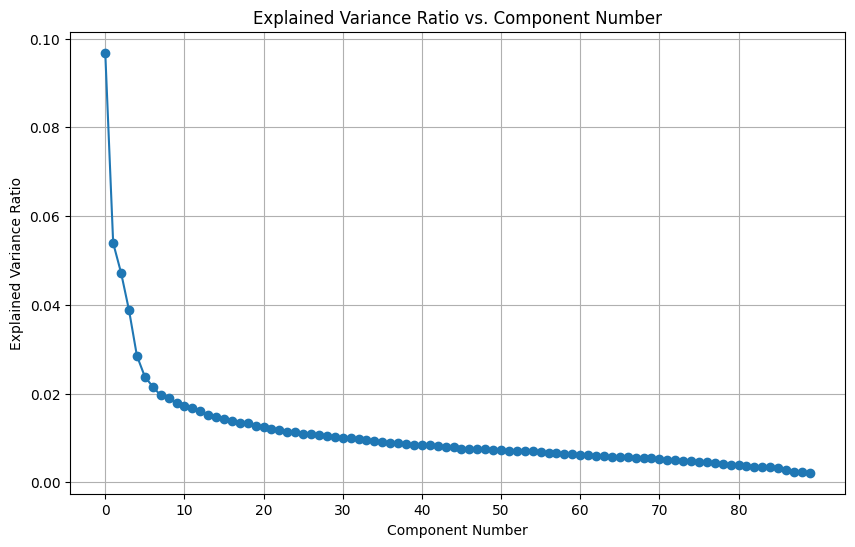

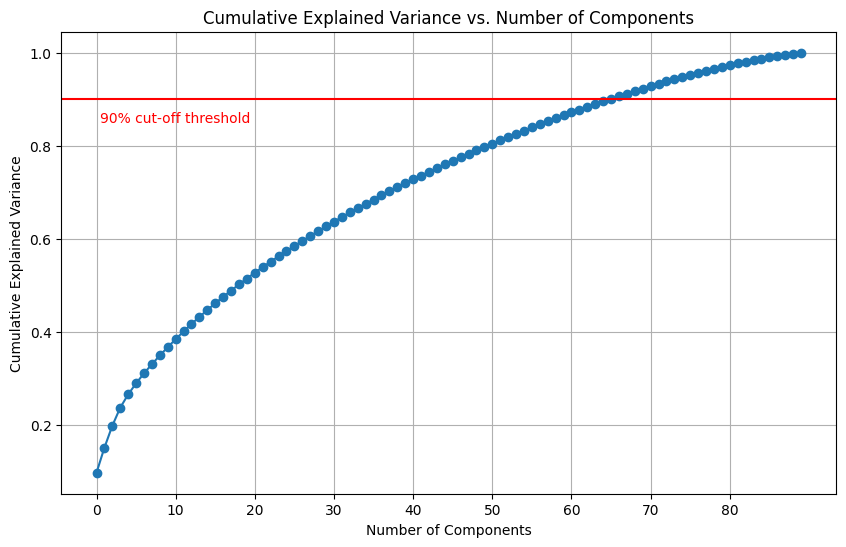

In [36]:
# Uso questa funzione per trovare il numero ottimale di componenti principali sulla spit Train-Test
find_optimal_num_components(X_train_scaled)

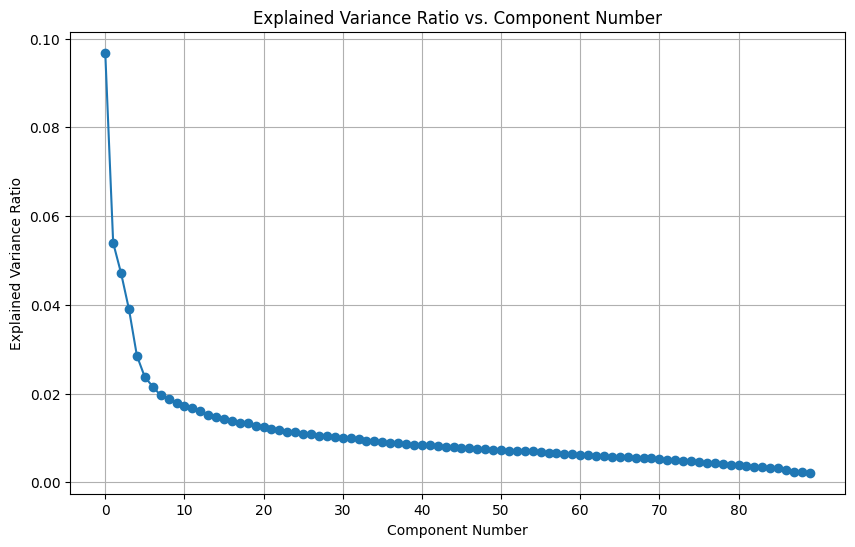

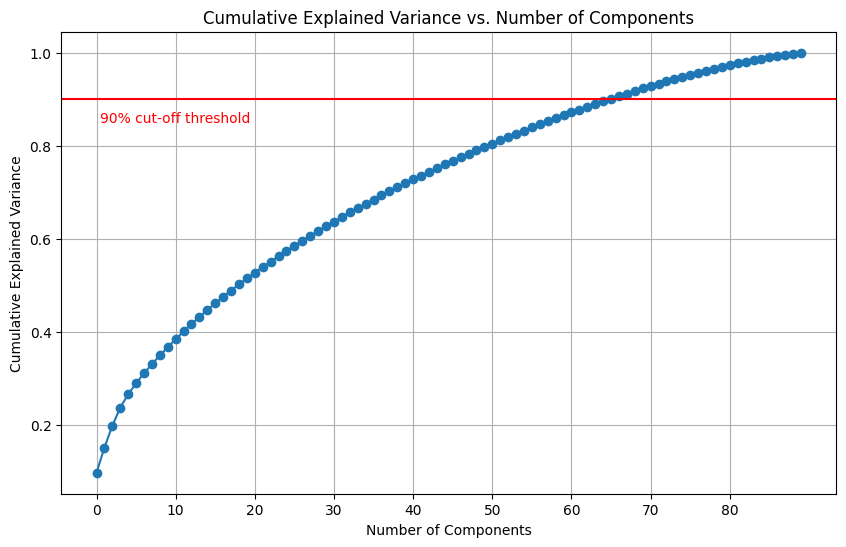

In [37]:
# Uso questa funzione per trovare il numero ottimale di componenti principali sulla spit Train-Test-Val
find_optimal_num_components(X_train_scaled2)

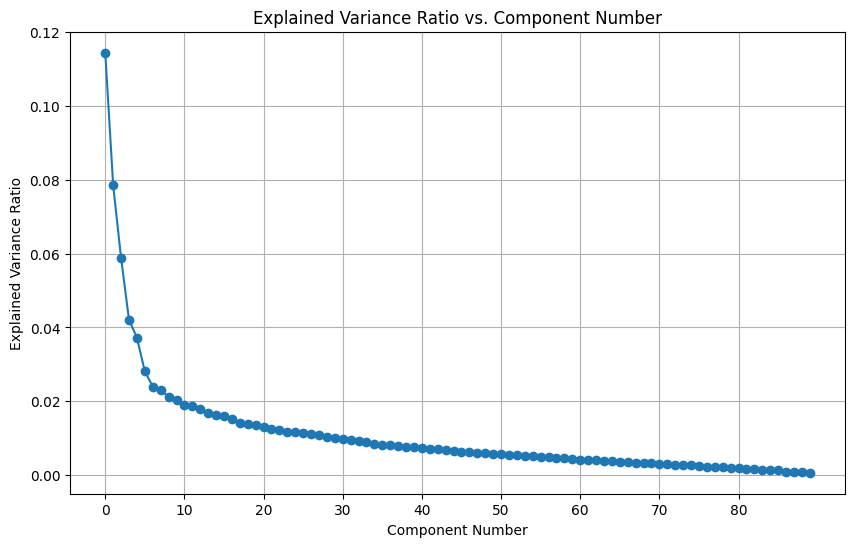

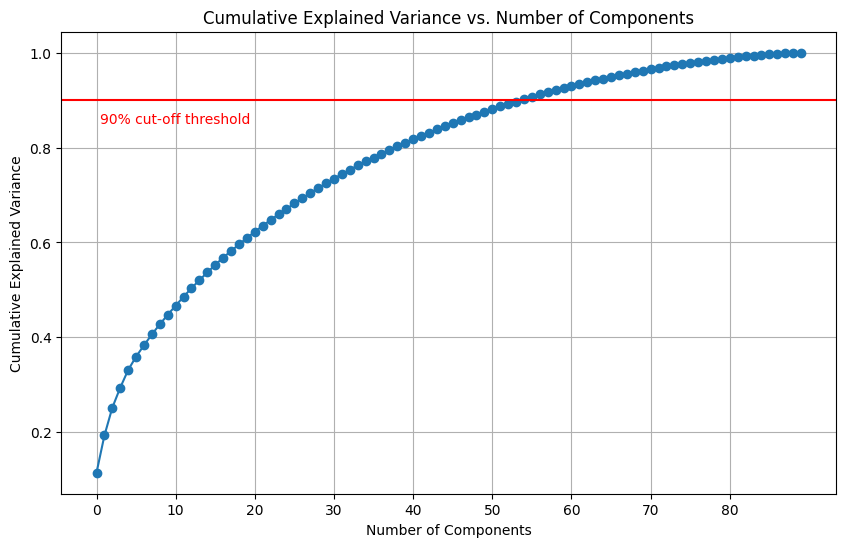

In [38]:
# Uso questa funzione per trovare il numero ottimale di componenti principali sulla spit Train-Test-Val senza gestione outliers
find_optimal_num_components(X_train_scaled_no_outliers)

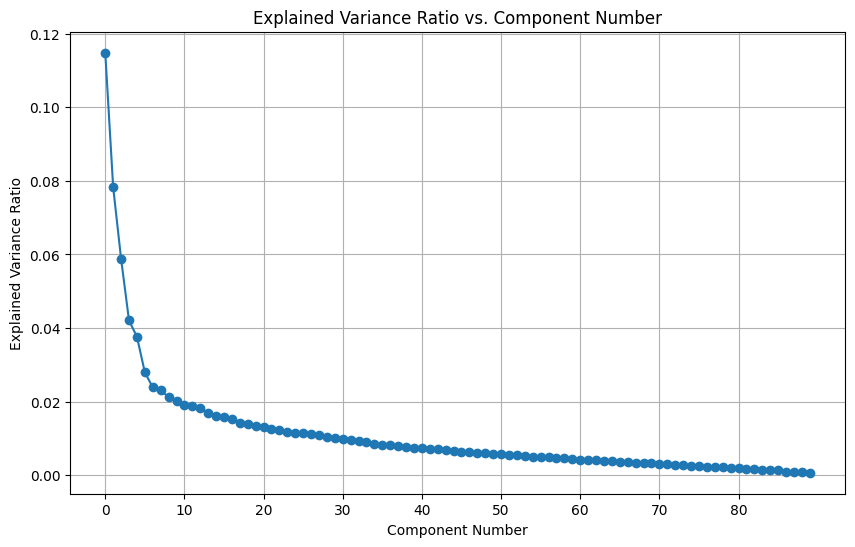

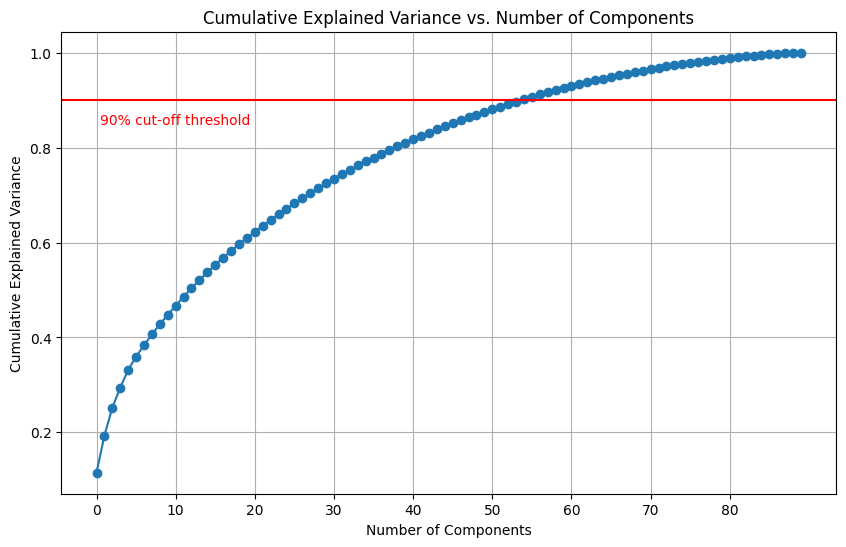

In [39]:
find_optimal_num_components(X_train_scaled_no_outliers2)

In [40]:
# Effettuo PCA sulla split Train-Test
pca = PCA(n_components=60)

principals_components_train = pca.fit_transform(X_train_scaled)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_test = pca.transform(X_test_scaled)

In [41]:
# Effettuo PCA sulla split Train-Test-Val
pca2 = PCA(n_components=60)

principals_components_train2 = pca2.fit_transform(X_train_scaled2)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_val2 = pca2.transform(X_val_scaled2)
principals_components_test2 = pca2.transform(X_test_scaled2)

In [42]:
# Effettuo PCA sulla split Train-Test-Val senza gestione outliers
pca_no_outliers = PCA(n_components=52)

principals_components_train_no_outliers = pca_no_outliers.fit_transform(X_train_scaled_no_outliers)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_val_no_outliers = pca_no_outliers.transform(X_val_scaled_no_outliers)
principals_components_test_no_outliers = pca_no_outliers.transform(X_test_scaled_no_outliers)

In [43]:
# Effettuo PCA sulla split Train-Test senza gestione outliers
pca_no_outliers2 = PCA(n_components=52)

principals_components_train_no_outliers2 = pca_no_outliers2.fit_transform(X_train_scaled_no_outliers2)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_test_no_outliers2 = pca_no_outliers2.transform(X_test_scaled_no_outliers2)

In [44]:
# Salvo i PCA della split Train-Test
np.save("./Datasets/Train_Test/PCA/principals_components_train.npy", principals_components_train)
np.save("./Datasets/Train_Test/PCA/principals_components_test.npy", principals_components_test)

In [45]:
# Salvo i PCA della split Train-Test-Val
np.save("./Datasets/Train_Val_Test/PCA/principals_components_train.npy", principals_components_train2)
np.save("./Datasets/Train_Val_Test/PCA/principals_components_val.npy", principals_components_val2)
np.save("./Datasets/Train_Val_Test/PCA/principals_components_test.npy", principals_components_test2)

In [46]:
# Salvo i PCA della split Train-Test-Val no gestione outliers
np.save("./Datasets/Train_Val_Test/PCA/no_outliers/principals_components_train.npy", principals_components_train_no_outliers)
np.save("./Datasets/Train_Val_Test/PCA/no_outliers/principals_components_val.npy", principals_components_val_no_outliers)
np.save("./Datasets/Train_Val_Test/PCA/no_outliers/principals_components_test.npy", principals_components_test_no_outliers)

In [47]:
# Salvo i PCA della split Train-Test no gestione outliers
np.save("./Datasets/Train_Test/PCA/no_outliers/principals_components_train.npy", principals_components_train_no_outliers2)
np.save("./Datasets/Train_Test/PCA/no_outliers/principals_components_test.npy", principals_components_test_no_outliers2)